# 🧠 Prediksi Risiko Kesehatan Mental Pekerja Menggunakan Machine Learning

Notebook ini bertujuan untuk membangun model machine learning yang dapat memprediksi risiko gangguan kesehatan mental pada pekerja, khususnya di industri teknologi. Permasalahan ini diangkat karena rendahnya kesadaran dan sistem deteksi dini terhadap kondisi mental karyawan, yang berdampak pada:
- Produktivitas
- Tingkat absensi
- Turnover yang tinggi

# Import Library

In [1]:
import math
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report

Pada bagian ini, dilakukan proses import library yang diperlukan untuk analisis data dan pengembangan model machine learning. Library seperti pandas, numpy, dan matplotlib.pyplot digunakan untuk manipulasi data dan visualisasi. seaborn mendukung visualisasi yang lebih informatif dan estetik. Peringatan yang tidak perlu disembunyikan menggunakan warnings.filterwarnings('ignore') agar output lebih bersih. Untuk pemodelan, digunakan berbagai algoritma klasifikasi dari scikit-learn, seperti K-Nearest Neighbors, Decision Tree, Random Forest, Support Vector Machine, dan Naïve Bayes. Selain itu, disertakan juga fungsi evaluasi model seperti accuracy_score, precision_score, recall_score, f1_score, dan confusion_matrix untuk mengukur performa model secara menyeluruh. Data juga akan diproses menggunakan StandardScaler dan dibagi menggunakan train_test_split agar model dapat dilatih dan diuji secara adil.

# Load Data

Pada sel ini, dataset terkait kesehatan mental pekerja diimpor dari repositori GitHub dalam format CSV menggunakan pandas.read_csv(). Dataset ini berisi informasi terkait atribut demografis, kondisi kerja, kebiasaan gaya hidup, serta skor terkait kesehatan mental dan produktivitas. Setelah data berhasil dimuat ke dalam DataFrame df, ditampilkan secara langsung untuk meninjau struktur dan isi awal dataset.

In [2]:
url = 'https://raw.githubusercontent.com/syafiqirz/Employee-Mental-Health-Risk-Classification/refs/heads/main/mental_health_dataset%202.csv'
df = pd.read_csv(url)
df

,age,gender,employment_status,work_environment,mental_health_history,seeks_treatment,stress_level,sleep_hours,physical_activity_days,depression_score,anxiety_score,social_support_score,productivity_score,mental_health_risk
0,56,Male,Employed,On-site,Yes,Yes,6,6.2,3,28,17,54,59.7,High
1,46,Female,Student,On-site,No,Yes,10,9.0,4,30,11,85,54.9,High
2,32,Female,Employed,On-site,Yes,No,7,7.7,2,24,7,62,61.3,Medium
3,60,Non-binary,Self-employed,On-site,No,No,4,4.5,4,6,0,95,97.0,Low
4,25,Female,Self-employed,On-site,Yes,Yes,3,5.4,0,24,12,70,69.0,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,34,Female,Employed,On-site,Yes,Yes,5,6.1,3,9,21,8,90.0,Medium
9996,47,Male,Employed,On-site,Yes,No,1,5.7,3,5,12,45,90.8,Medium
9997,56,Female,Employed,On-site,Yes,No,1,8.3,0,1,18,7,99.2,Medium
9998,24,Male,Employed,On-site,Yes,Yes,9,6.1,0,28,21,32,56.7,High


Sel ini digunakan untuk mengetahui distribusi data berdasarkan kolom employment_status (status pekerjaan). Dengan menggunakan value_counts(), ditampilkan jumlah data untuk masing-masing kategori seperti Employed, Student, Self-employed, dan Unemployed. Informasi ini berguna untuk memahami proporsi data serta menentukan subset data yang akan dianalisis.

In [3]:
df['employment_status'].value_counts()

,count
employment_status,
Employed,5868
Student,2043
Self-employed,1045
Unemployed,1044


Karena fokus proyek adalah pada prediksi risiko kesehatan mental pekerja, maka hanya data dengan status pekerjaan Employed yang dipertahankan. Data lainnya (misalnya mahasiswa atau pengangguran) dihapus. Setelah proses penyaringan, indeks DataFrame di-reset agar terurut kembali dari nol.

In [4]:
df = df[df['employment_status'] == 'Employed']
df.reset_index(drop=True, inplace=True)
df

,age,gender,employment_status,work_environment,mental_health_history,seeks_treatment,stress_level,sleep_hours,physical_activity_days,depression_score,anxiety_score,social_support_score,productivity_score,mental_health_risk
0,56,Male,Employed,On-site,Yes,Yes,6,6.2,3,28,17,54,59.7,High
1,32,Female,Employed,On-site,Yes,No,7,7.7,2,24,7,62,61.3,Medium
2,56,Non-binary,Employed,Remote,No,Yes,2,5.5,1,25,3,87,63.1,Medium
3,40,Male,Employed,Hybrid,No,No,7,6.5,6,28,6,46,60.4,Medium
4,28,Female,Employed,Remote,No,No,8,3.1,0,7,18,88,93.2,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5863,19,Female,Employed,Hybrid,No,No,4,4.5,4,23,2,14,65.6,Medium
5864,34,Female,Employed,On-site,Yes,Yes,5,6.1,3,9,21,8,90.0,Medium
5865,47,Male,Employed,On-site,Yes,No,1,5.7,3,5,12,45,90.8,Medium
5866,56,Female,Employed,On-site,Yes,No,1,8.3,0,1,18,7,99.2,Medium


Sel ini digunakan untuk memverifikasi bahwa hanya data dengan employment_status bernilai Employed yang tersisa setelah proses penyaringan. Output menunjukkan bahwa semua data sekarang berasal dari kategori pekerja aktif.

In [5]:
df['employment_status'].value_counts()

,count
employment_status,
Employed,5868


Karena seluruh data kini berasal dari kelompok Employed, kolom employment_status sudah tidak lagi memberikan informasi tambahan yang berguna dan dihapus dari DataFrame. Penghapusan dilakukan menggunakan fungsi drop() dengan axis=1 yang berarti kolom, bukan baris.

In [6]:
df = df.drop('employment_status', axis=1)
df

,age,gender,work_environment,mental_health_history,seeks_treatment,stress_level,sleep_hours,physical_activity_days,depression_score,anxiety_score,social_support_score,productivity_score,mental_health_risk
0,56,Male,On-site,Yes,Yes,6,6.2,3,28,17,54,59.7,High
1,32,Female,On-site,Yes,No,7,7.7,2,24,7,62,61.3,Medium
2,56,Non-binary,Remote,No,Yes,2,5.5,1,25,3,87,63.1,Medium
3,40,Male,Hybrid,No,No,7,6.5,6,28,6,46,60.4,Medium
4,28,Female,Remote,No,No,8,3.1,0,7,18,88,93.2,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5863,19,Female,Hybrid,No,No,4,4.5,4,23,2,14,65.6,Medium
5864,34,Female,On-site,Yes,Yes,5,6.1,3,9,21,8,90.0,Medium
5865,47,Male,On-site,Yes,No,1,5.7,3,5,12,45,90.8,Medium
5866,56,Female,On-site,Yes,No,1,8.3,0,1,18,7,99.2,Medium


# 📊 Exploratory Data Analysis (EDA)

Pada tahap EDA ini, dilakukan eksplorasi awal terhadap data untuk memahami struktur, distribusi, dan karakteristik masing-masing variabel. EDA membantu dalam mengidentifikasi potensi masalah seperti data kosong, pencilan (outliers), atau distribusi yang tidak seimbang yang dapat mempengaruhi performa model. Proses ini merupakan langkah penting sebelum dilakukan pemodelan machine learning, karena kualitas input data akan sangat menentukan kualitas prediksi yang dihasilkan.

## Deskripsi Variabel

Sel ini digunakan untuk melihat informasi umum mengenai dataset, seperti nama kolom, tipe data, dan jumlah nilai tidak kosong pada setiap kolom. Hasil menunjukkan bahwa seluruh kolom memiliki 5868 baris tanpa nilai yang hilang (missing values) dan terdiri dari kombinasi tipe data numerik (int64, float64) dan kategorikal (object).

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5868 entries, 0 to 5867
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     5868 non-null   int64  
 1   gender                  5868 non-null   object 
 2   work_environment        5868 non-null   object 
 3   mental_health_history   5868 non-null   object 
 4   seeks_treatment         5868 non-null   object 
 5   stress_level            5868 non-null   int64  
 6   sleep_hours             5868 non-null   float64
 7   physical_activity_days  5868 non-null   int64  
 8   depression_score        5868 non-null   int64  
 9   anxiety_score           5868 non-null   int64  
 10  social_support_score    5868 non-null   int64  
 11  productivity_score      5868 non-null   float64
 12  mental_health_risk      5868 non-null   object 
dtypes: float64(2), int64(6), object(5)
memory usage: 596.1+ KB


Fungsi describe() memberikan ringkasan statistik dari kolom numerik, seperti nilai minimum, maksimum, rata-rata, dan kuartil. Informasi ini sangat penting untuk memahami distribusi data dan skala masing-masing fitur. Misalnya, stress_level memiliki rentang 1–10, sementara depression_score berkisar antara 0–30. Hal ini juga memberi gambaran awal apakah ada kemungkinan data yang ekstrem

In [8]:
df.describe()

,age,stress_level,sleep_hours,physical_activity_days,depression_score,anxiety_score,social_support_score,productivity_score
count,5868.000000,5868.000000,5868.000000,5868.000000,5868.000000,5868.000000,5868.000000,5868.000000
mean,41.761588,5.599523,6.446677,3.512440,15.061691,10.494717,50.073449,77.277284
std,13.684977,2.884838,1.469401,2.285193,8.968476,6.304295,29.351096,14.041533
min,18.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,42.800000
25%,30.000000,3.000000,5.500000,2.000000,7.000000,5.000000,24.000000,65.900000
50%,42.000000,6.000000,6.400000,4.000000,15.000000,11.000000,50.000000,77.300000
75%,53.000000,8.000000,7.500000,6.000000,23.000000,16.000000,76.000000,89.225000
max,65.000000,10.000000,10.000000,7.000000,30.000000,21.000000,100.000000,100.000000


# Deskripsi Variabel Dataset Mental Health

## Fitur Kategorikal

**gender**  
Jenis kelamin responden (Male, Female, Non-binary, Prefer not to say)

**work_environment**  
Lingkungan kerja (On-site, Remote, Hybrid)

**mental_health_history**  
Riwayat masalah mental sebelumnya (Yes/No)

**seeks_treatment**  
Pernah mencari bantuan profesional (Yes/No)

**mental_health_risk**  
Tingkat risiko kesehatan mental (Low, Medium, High)

## Fitur Numerikal

**age**  
Usia responden (18-65 tahun)

**stress_level**  
Tingkat stres (skala 1-10)

**sleep_hours**  
Rata-rata jam tidur harian (3-10 jam)

**physical_activity_days**  
Hari aktif fisik per minggu (0-7 hari)

**depression_score**  
Skor depresi (0-30, makin tinggi makin parah)

**anxiety_score**  
Skor kecemasan (0-21)

**social_support_score**  
Tingkat dukungan sosial (0-100)

**productivity_score**  
Tingkat produktivitas (0-100, makin tinggi makin baik)

## Menangani Missing Value

Dari hasil df.info() sebelumnya dan sel di bawah ini, diketahui bahwa tidak ada nilai yang hilang pada dataset ini. Dengan demikian, tidak perlu dilakukan penanganan terhadap missing value, dan data dapat langsung digunakan untuk eksplorasi lanjutan dan pelatihan model.

In [9]:
df.isnull().sum()

,0
age,0
gender,0
work_environment,0
mental_health_history,0
seeks_treatment,0
stress_level,0
sleep_hours,0
physical_activity_days,0
depression_score,0
anxiety_score,0


## Deteksi Outliers


Sel ini menampilkan boxplot untuk seluruh kolom numerik, yang digunakan untuk mendeteksi outlier (nilai ekstrem). Boxplot memudahkan visualisasi distribusi dan outlier. Dari hasil visualisasi, tidak ditemukan outlier yang mencolok pada variabel-variabel numerik seperti sleep_hours, stress_level, maupun productivity_score. Ini menunjukkan bahwa data memiliki distribusi yang relatif bersih dan tidak perlu dilakukan transformasi atau penghapusan nilai outlier.

In [10]:
categorical_columns = df.select_dtypes(exclude=np.number).columns.tolist()
numerical_columns = df.select_dtypes(include=np.number).columns.tolist()

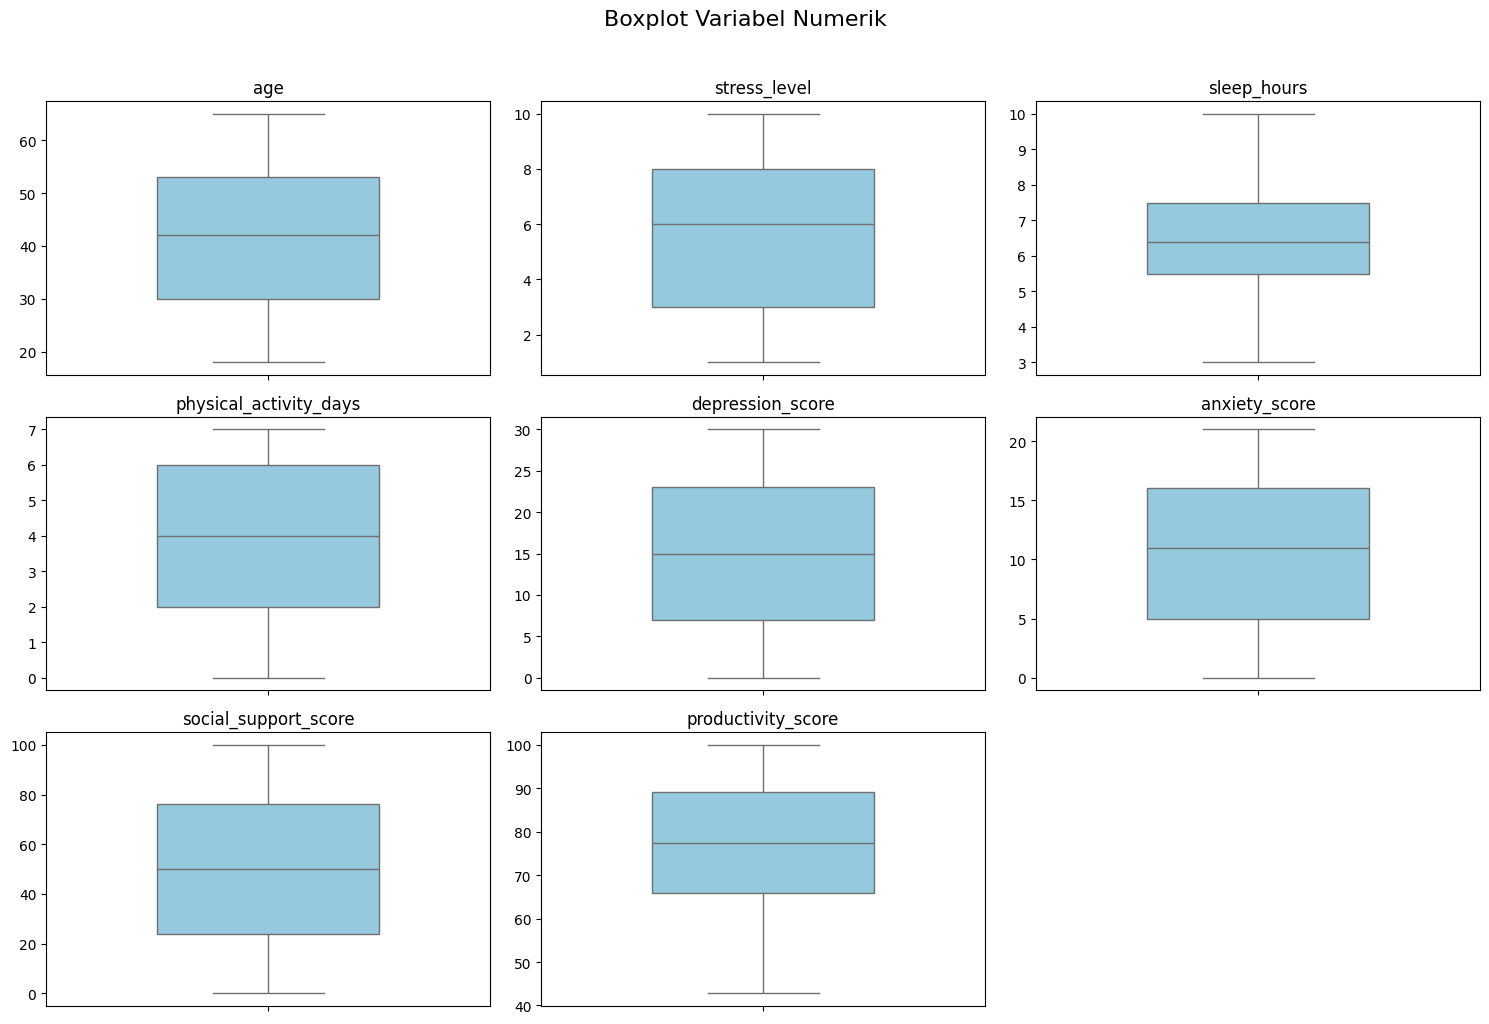

In [11]:
plt.figure(figsize=(15, 10))
plt.suptitle('Boxplot Variabel Numerik', y=1.02, fontsize=16)

for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)  # 3 baris, 3 kolom, posisi ke-i
    sns.boxplot(data=df, y=col, color='skyblue', width=0.5)
    plt.title(col)
    plt.ylabel('')

plt.tight_layout()
plt.show()

## Analisis Univariat

Visualisasi ini menunjukkan distribusi frekuensi dari masing-masing variabel kategorikal dalam dataset. Tujuannya adalah untuk memahami bagaimana data tersebar pada tiap kategori dan apakah ada ketidakseimbangan yang signifikan yang perlu diperhatikan saat proses pemodelan.

### Variabel Kategorikal

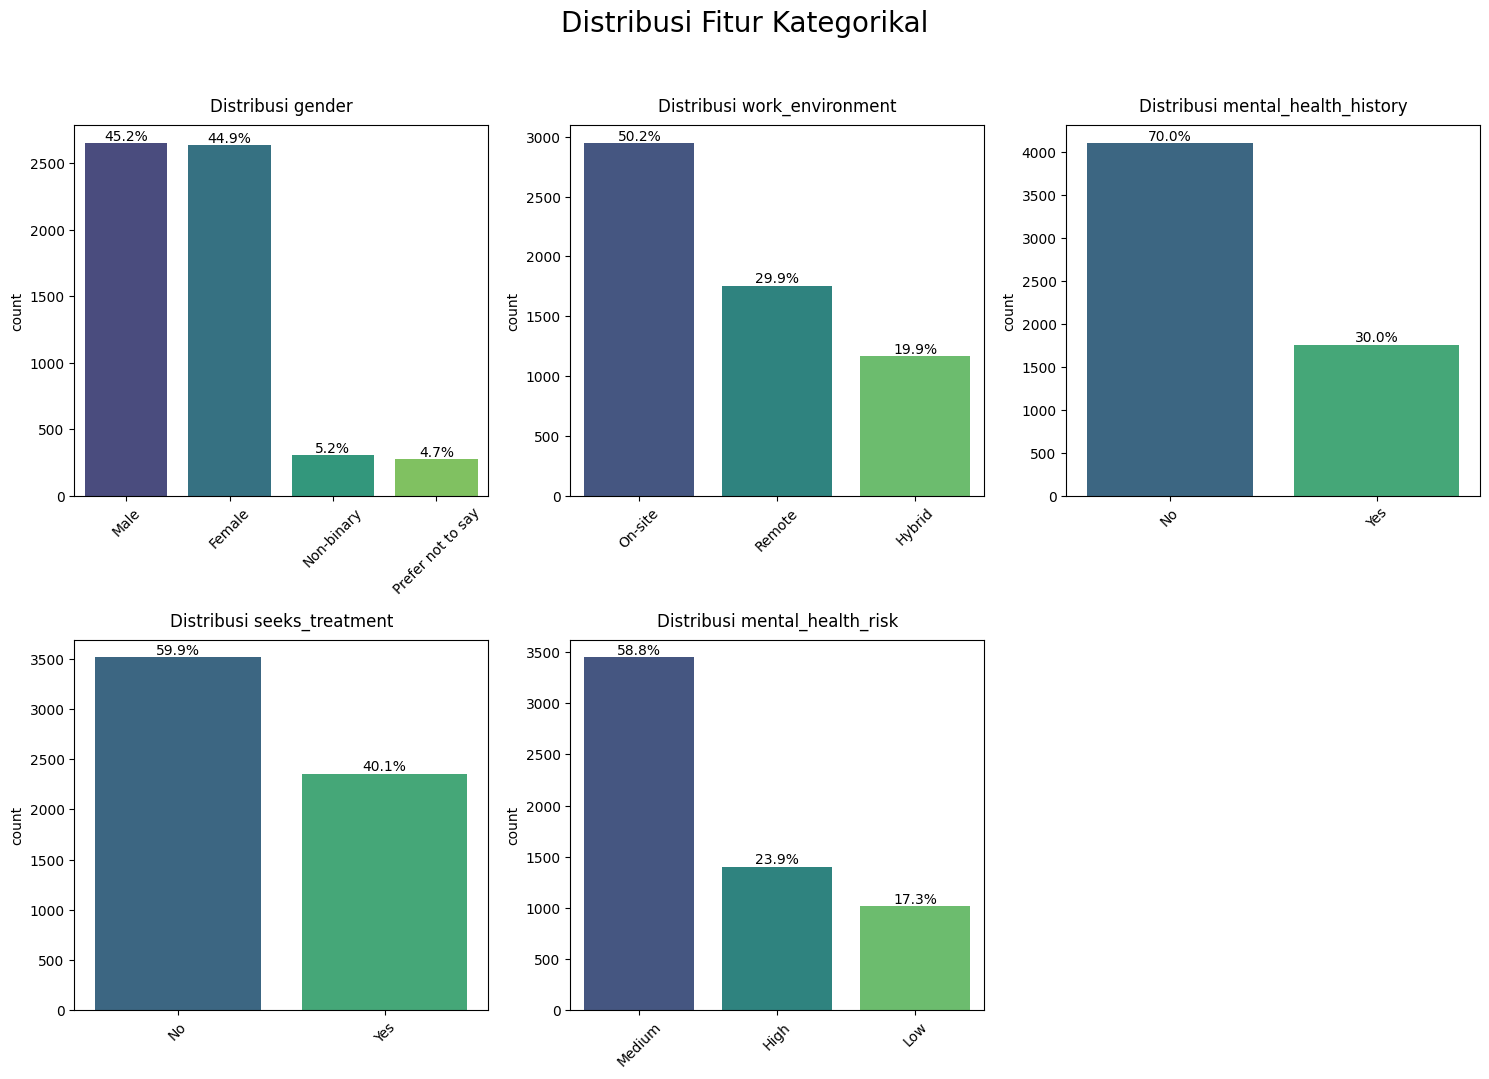

In [12]:
plt.figure(figsize=(15, 15))
plt.suptitle('Distribusi Fitur Kategorikal', y=1.02, fontsize=20)
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(3, 3, i)
    ax = sns.countplot(data=df, x=col, palette='viridis',
                      order=df[col].value_counts().index)

    total = len(df)
    for p in ax.patches:
        percentage = f'{100 * p.get_height()/total:.1f}%'
        ax.annotate(percentage,
                   (p.get_x() + p.get_width()/2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 5),
                   textcoords='offset points')

    plt.title(f'Distribusi {col}', pad=10)
    plt.xticks(rotation=45)
    plt.xlabel('')

plt.tight_layout()
plt.show()

### Distribusi Variabel Kategorikal

#### **gender**:
Terdapat distribusi yang hampir seimbang antara responden laki-laki (45.2%) dan perempuan (44.9%). Sisanya adalah responden yang memilih identitas non-biner (5.2%) atau tidak ingin menyebutkan gender mereka (4.7%).

#### **work_environment**:
Mayoritas responden bekerja secara on-site (50.2%), diikuti oleh yang bekerja secara remote (29.9%), dan hybrid (19.9%). Ini menunjukkan mayoritas data berasal dari lingkungan kerja fisik.

#### **mental_health_history**:
Sebanyak 70.0% responden tidak memiliki riwayat gangguan kesehatan mental, sementara 30.0% lainnya memiliki riwayat tersebut. Proporsi ini penting diperhatikan saat mengevaluasi risiko kesehatan mental.

#### **seeks_treatment**:
Sebagian besar responden (59.9%) tidak mencari pengobatan, sementara 40.1% lainnya melaporkan pernah mencari bantuan atau pengobatan terkait kesehatan mental.

#### **mental_health_risk**:
Distribusi tingkat risiko kesehatan mental menunjukkan bahwa sebagian besar responden dikategorikan sebagai risiko sedang (Medium) sebesar 58.8%, diikuti oleh risiko tinggi (High) 23.9%, dan risiko rendah (Low) 17.3%. Distribusi ini menunjukkan adanya ketidakseimbangan kelas yang mungkin perlu ditangani pada tahap pemodelan klasifikasi.

### Variabel Numerikal

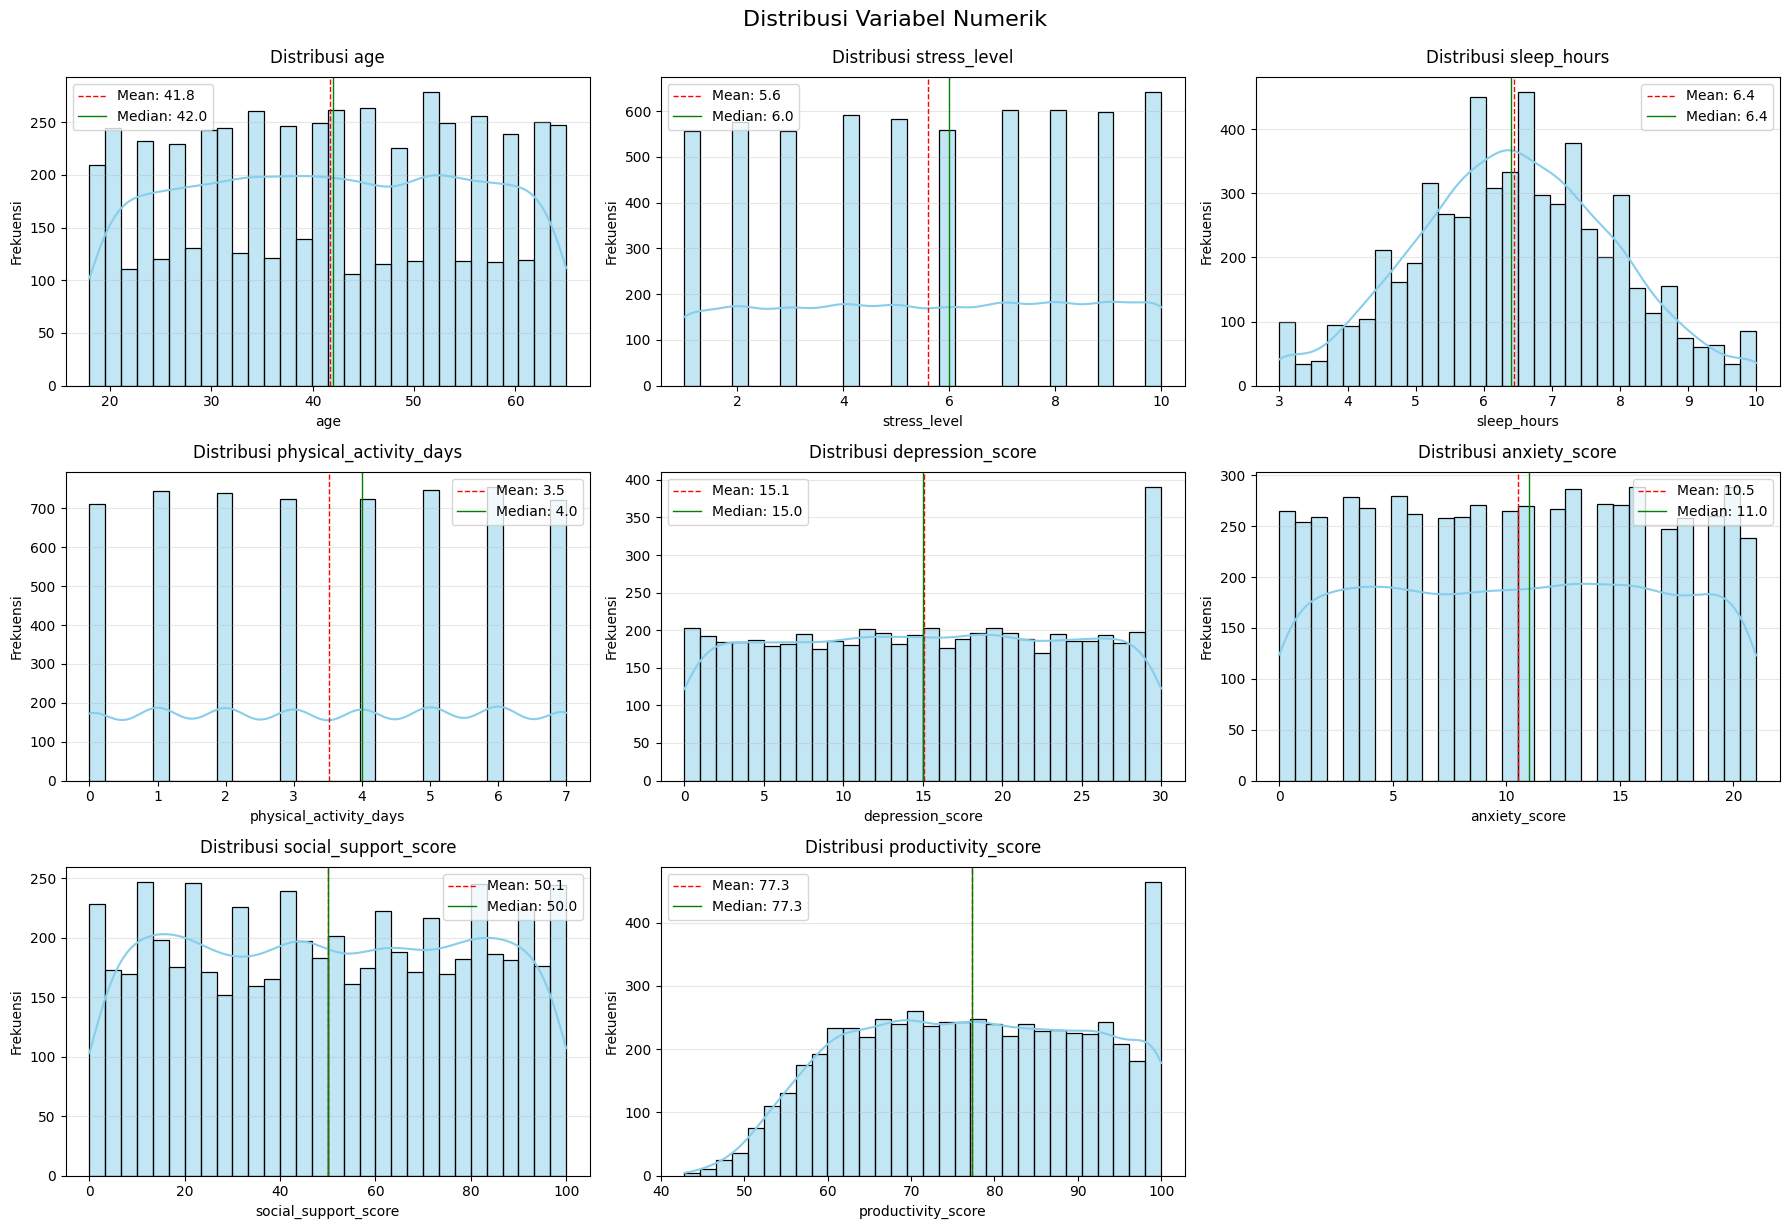

In [13]:
plt.figure(figsize=(18, 12))

for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data=df, x=col, kde=True, bins=30, color='skyblue')

    plt.title(f'Distribusi {col}', fontsize=12, pad=10)
    plt.xlabel(col, fontsize=10)
    plt.ylabel('Frekuensi', fontsize=10)
    plt.grid(axis='y', alpha=0.3)

    mean_val = df[col].mean()
    median_val = df[col].median()
    plt.axvline(mean_val, color='red', linestyle='--', linewidth=1, label=f'Mean: {mean_val:.1f}')
    plt.axvline(median_val, color='green', linestyle='-', linewidth=1, label=f'Median: {median_val:.1f}')
    plt.legend()

plt.tight_layout()
plt.suptitle('Distribusi Variabel Numerik', y=1.02, fontsize=16)
plt.show()

### Distribusi Fitur Numerikal

#### **age**  
Distribusi usia cukup merata antara 18 hingga 65 tahun, dengan rata-rata 41.8 dan median 42.0. Ini menunjukkan sebaran usia yang luas tanpa dominasi kelompok usia tertentu.

#### **stress_level**  
Variabel ini memiliki nilai antara 1 hingga 10, dengan distribusi mendekati seragam. Rata-rata (5.6) dan median (6.0) menunjukkan bahwa sebagian besar individu mengalami tingkat stres sedang.

#### **sleep_hours**  
Sebaran cenderung normal dengan puncak di sekitar 6–7 jam tidur per malam. Rata-rata dan median identik di angka 6.4, menunjukkan distribusi simetris.

#### **physical_activity_days**  
Menunjukkan jumlah hari aktif secara fisik per minggu (0–7 hari). Median (4 hari) lebih tinggi dari rata-rata (3.5 hari), menandakan sedikit skew ke kiri (lebih banyak individu dengan sedikit hari aktif).

#### **depression_score**  
Skor ini berkisar 0–30 dengan distribusi hampir seragam. Mean dan median berada di tengah (15.1 dan 15.0), menunjukkan tidak adanya kemencengan signifikan.

#### **anxiety_score**  
Distribusi cenderung merata dengan puncak kecil di skor menengah. Rata-rata (10.5) sedikit lebih rendah dari median (11.0), menunjukkan sedikit skew ke kiri.

#### **social_support_score**  
Skor ini berkisar dari 0 hingga 100. Distribusinya hampir seragam, dengan rata-rata (50.1) dan median (50.0), menandakan distribusi yang sangat simetris.

#### **productivity_score**  
Distribusi sedikit miring ke kiri, dengan lebih banyak nilai tinggi (80+). Rata-rata dan median berada di sekitar 77.3, mencerminkan mayoritas responden memiliki tingkat produktivitas tinggi.

## Analisis Multivariat

## Analisis Multivariat: Keterkaitan Fitur Kategorikal dengan mental_health_risk

Visualisasi berikut memperlihatkan bagaimana risiko kesehatan mental (`mental_health_risk`) terdistribusi dalam setiap kategori dari variabel kategorikal. Tujuannya adalah untuk melihat pola dan hubungan potensial antara karakteristik individu dengan tingkat risiko kesehatan mental.

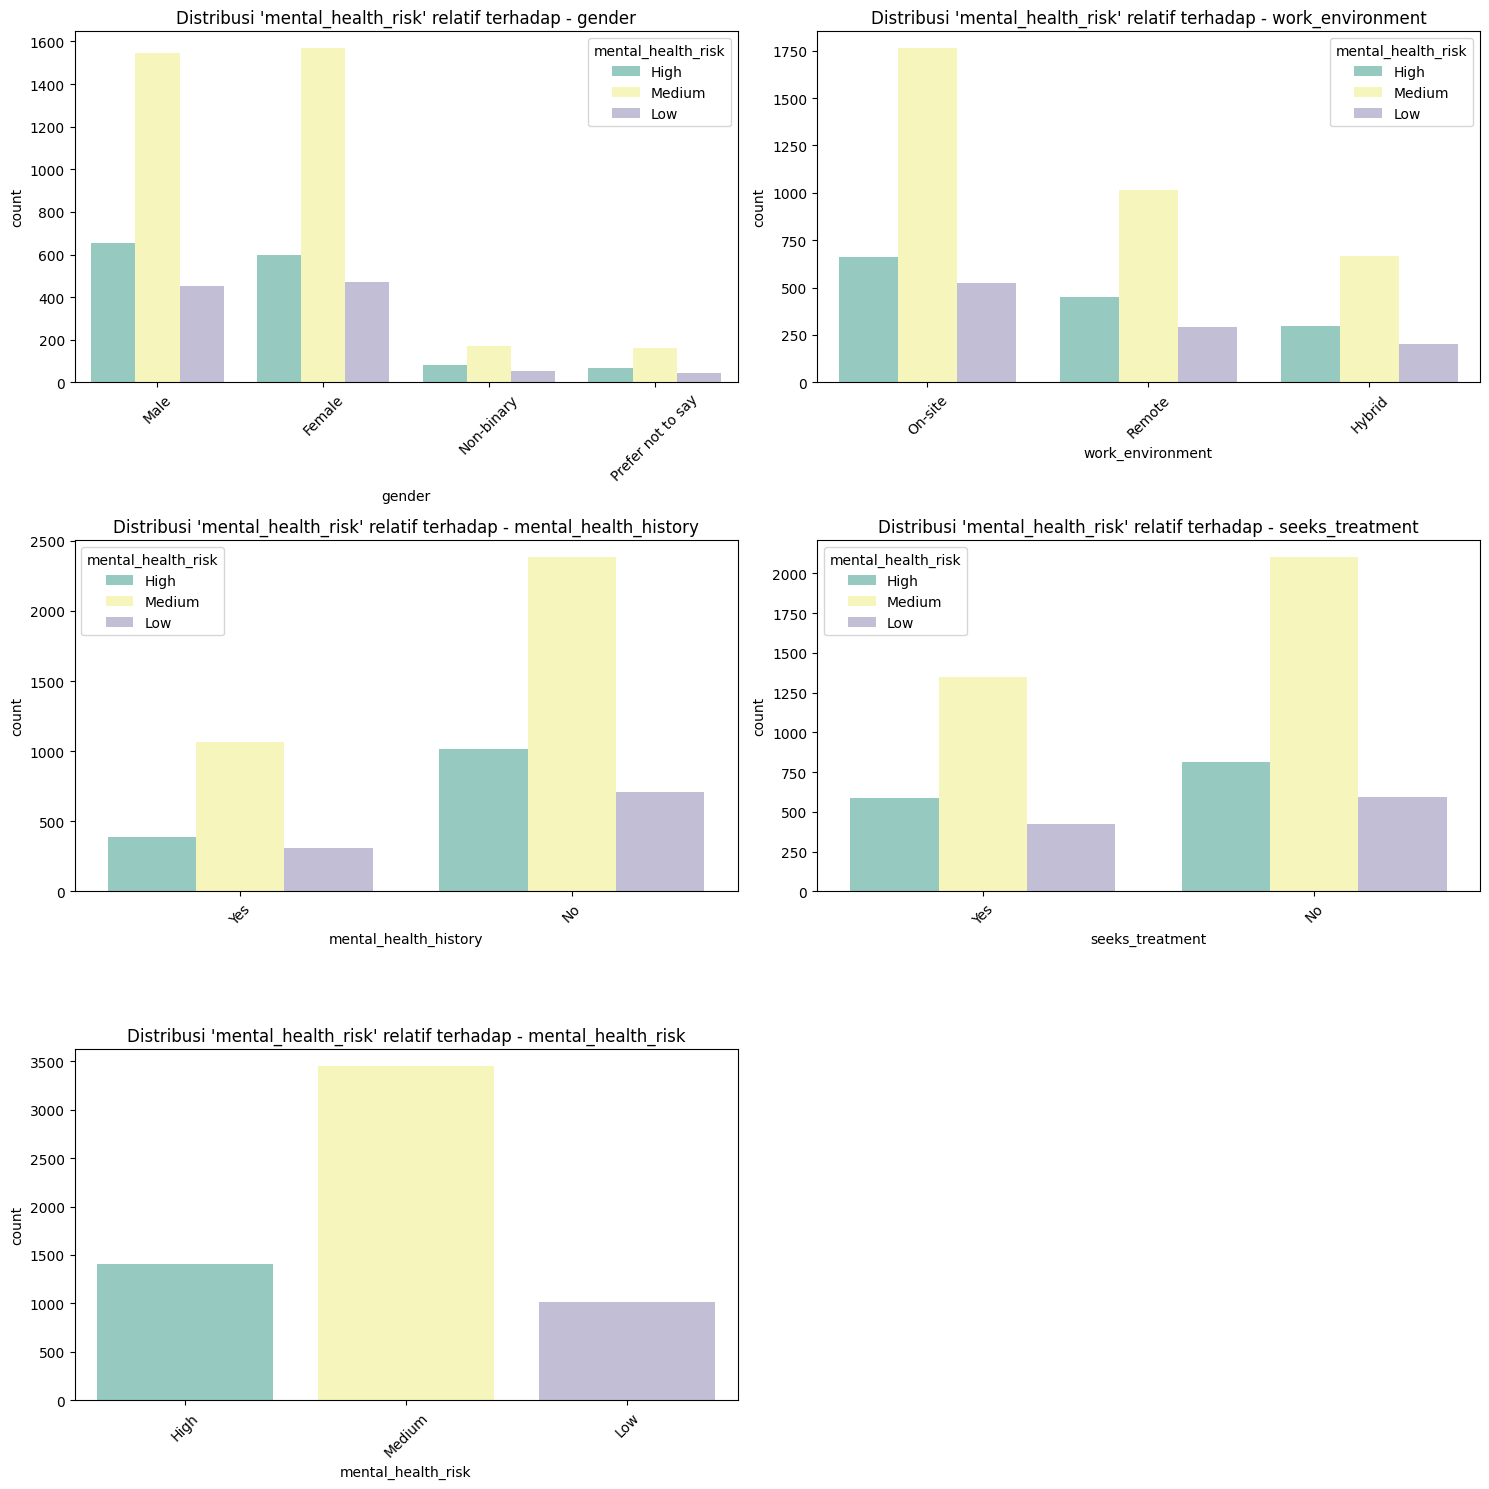

In [14]:
# Tentukan jumlah kolom per baris
cols = 2
rows = math.ceil(len(categorical_columns) / cols)

plt.figure(figsize=(15, 5 * rows))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(rows, cols, i)
    sns.countplot(data=df, x=col, hue='mental_health_risk', palette='Set3')
    plt.title(f"Distribusi 'mental_health_risk' relatif terhadap - {col}")
    plt.xticks(rotation=45)  # Jika label sumbu X panjang
plt.tight_layout()
plt.show()

### Penjelasan Tiap Grafik:

1. **`gender` vs `mental_health_risk`**  
   Menunjukkan perbedaan tingkat risiko berdasarkan jenis kelamin. Terlihat bahwa mayoritas responden perempuan memiliki risiko sedang. Jumlah risiko tinggi juga tampak lebih banyak pada perempuan dibandingkan laki-laki secara absolut.

2. **`work_environment` vs `mental_health_risk`**  
   Responden yang bekerja di lingkungan on-site cenderung memiliki risiko sedang. Sementara itu, pekerja remote memiliki distribusi risiko yang lebih seimbang, dengan proporsi risiko tinggi yang mencolok.

3. **`mental_health_history` vs `mental_health_risk`**  
   Responden yang memiliki riwayat kesehatan mental sebelumnya cenderung memiliki risiko tinggi yang lebih besar dibandingkan yang tidak memiliki riwayat.

4. **`seeks_treatment` vs `mental_health_risk`**  
   Responden yang pernah mencari pengobatan menunjukkan tingkat risiko tinggi yang lebih tinggi daripada yang belum pernah mencari bantuan.

5. **`mental_health_risk` (self-grouped)**  
   Menampilkan distribusi total dari seluruh risiko. Mayoritas responden dikategorikan dalam risiko sedang, dengan kelompok risiko tinggi dan rendah yang relatif lebih kecil.

## Analisis Multivariat: Pairplot Antar Variabel Numerik

Visualisasi berikut menggunakan **pairplot** untuk memetakan hubungan antar seluruh fitur numerik dalam dataset. Pairplot menampilkan scatter plot untuk setiap pasangan fitur dan **distribusi (KDE)** di diagonal.

### Tujuan:
- Melihat pola hubungan antar fitur numerik secara visual.
- Mengidentifikasi potensi **korelasi linear** atau non-linear.
- Mengamati bentuk distribusi setiap fitur numerik.

In [15]:
map = {
    'Low': 0,
    'Medium': 1,
    'High': 2
}
df['mental_health_risk_encoded'] = df['mental_health_risk'].map(map)

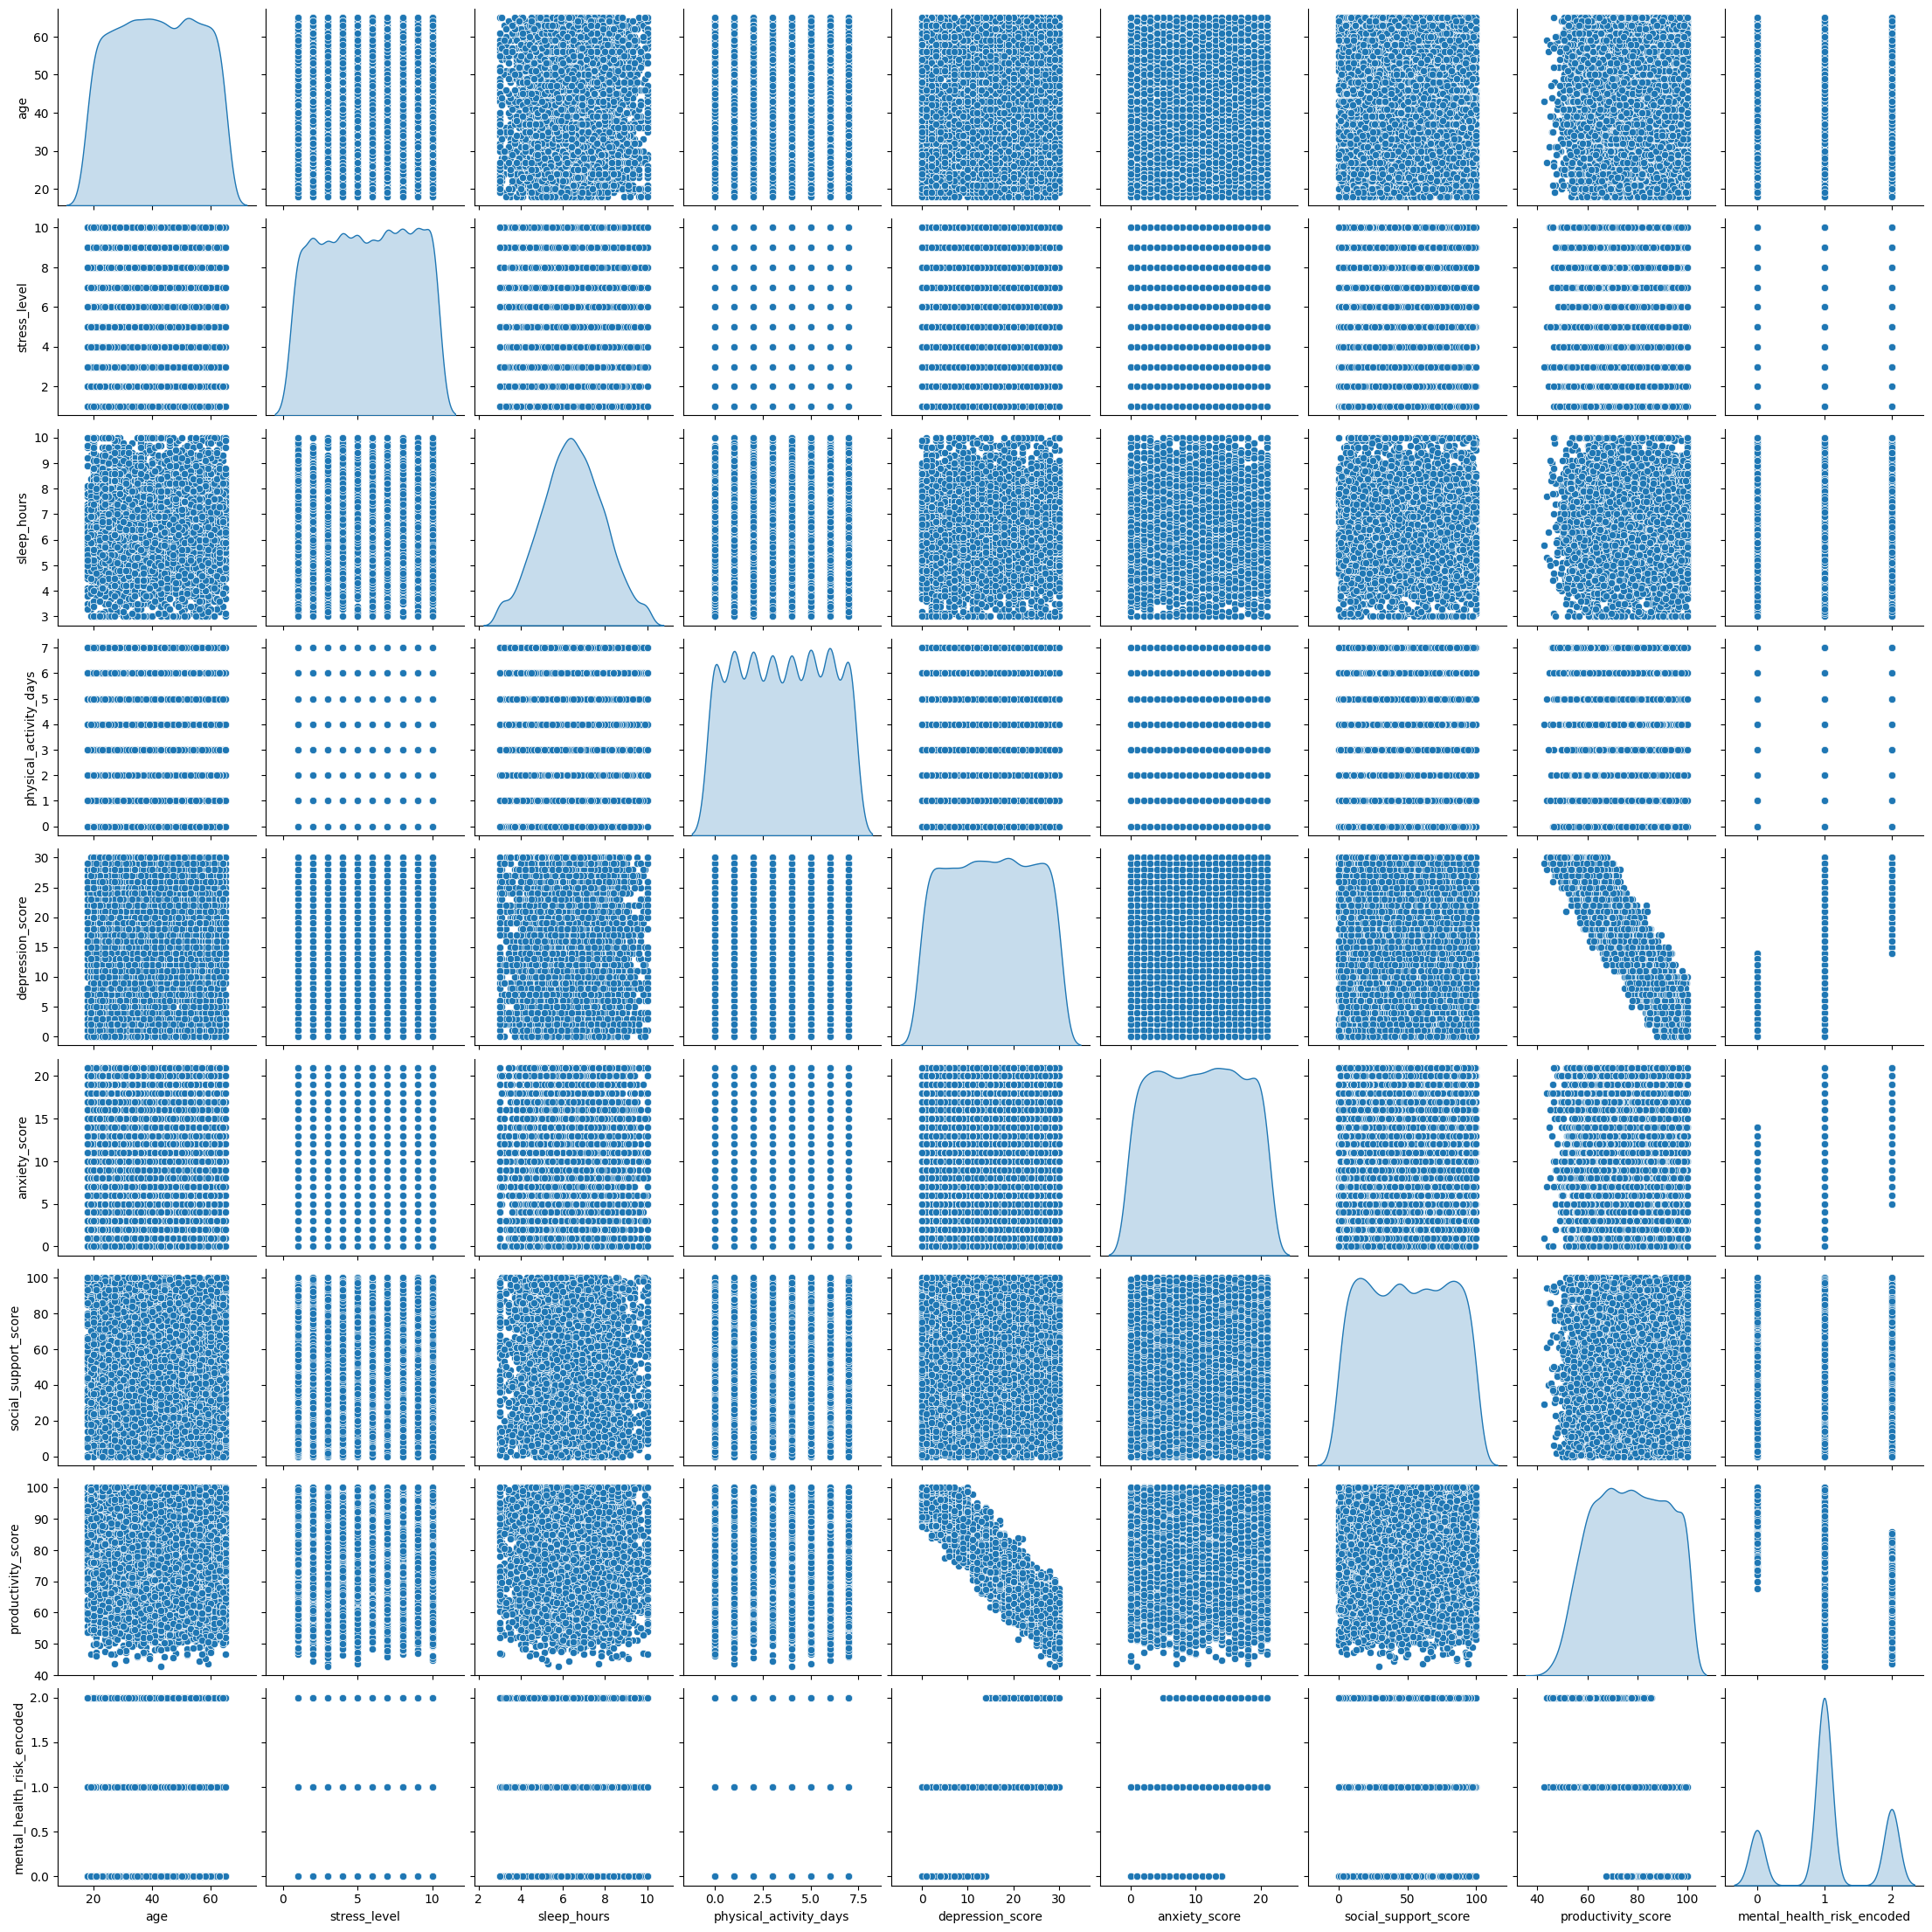

In [16]:
sns.pairplot(df, diag_kind = 'kde')

### Insight dari Visualisasi:
- **`depression_score`** dan **`productivity_score`** memperlihatkan pola **korelasi negatif yang kuat**, sejalan dengan hasil korelasi sebelumnya.
- Korelasi antara **`depression_score`** dan **`anxiety_score`** terlihat dari sebaran yang cenderung membentuk pola linear positif.
- Fitur seperti `age`, `sleep_hours`, `stress_level`, dan `physical_activity_days` tampaknya memiliki distribusi cukup datar atau tidak menunjukkan pola hubungan jelas dengan fitur lain secara visual.
- Variabel target `mental_health_risk_encoded` tidak terlalu menunjukkan pemisahan visual yang kuat, namun nilai-nilainya terkonsentrasi pada kategori diskrit, sesuai ekspektasi.

## Analisis Multivariat: Korelasi antar Variabel Numerik

Visualisasi ini menampilkan **matriks korelasi** antara seluruh variabel numerik, termasuk `mental_health_risk` yang telah di-encode menjadi nilai numerik (`Low=0`, `Medium=1`, `High=2`).

### Tujuan:
Untuk memahami sejauh mana hubungan linear antar fitur, serta mengidentifikasi fitur yang mungkin berkorelasi kuat dengan `mental_health_risk`.

<Axes: title={'center': 'Correlation Matrix untuk Fitur Numerik '}>

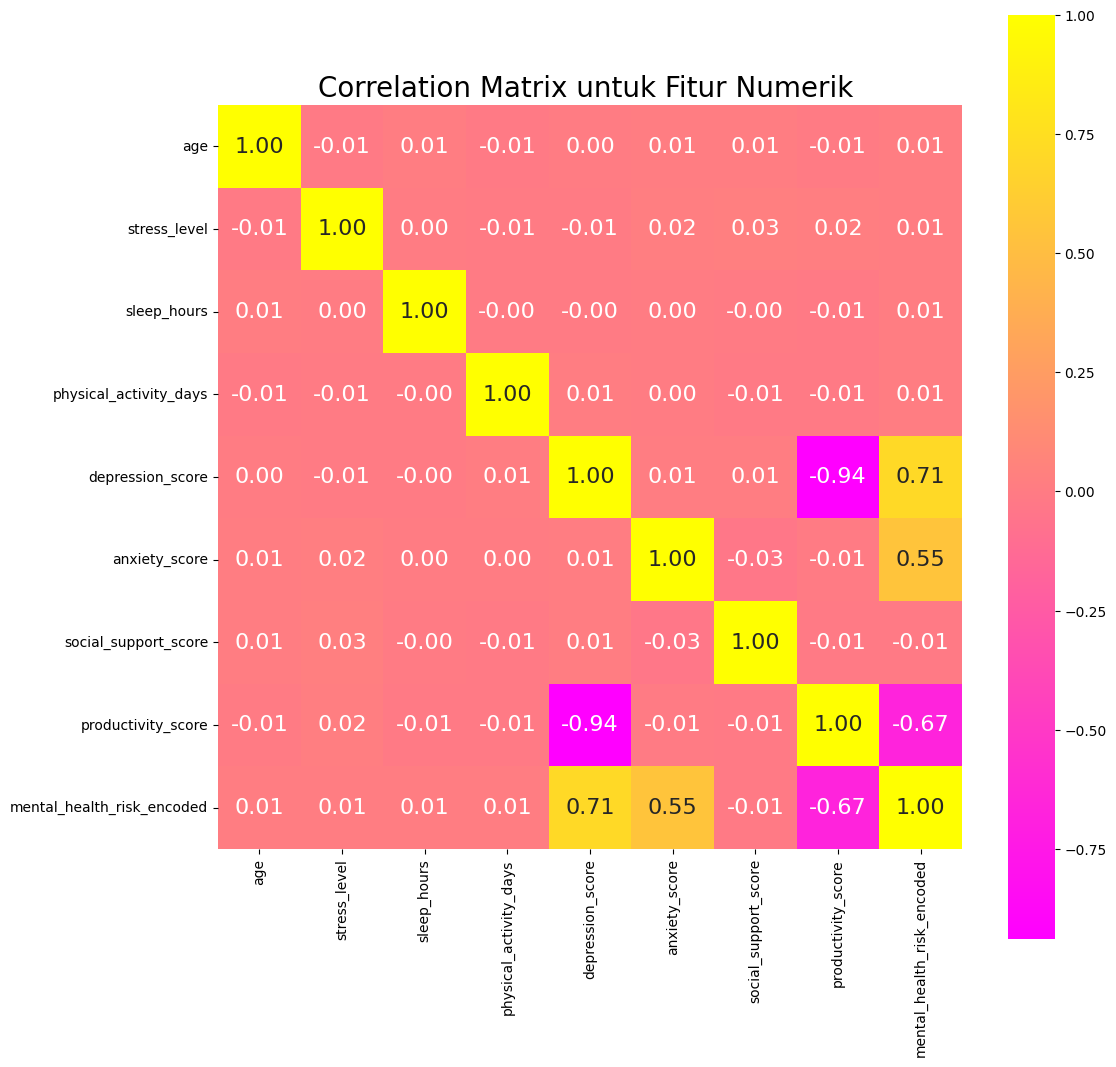

In [17]:
numerical_columns = df.select_dtypes(include=np.number).columns.tolist()

correlation=df[numerical_columns].corr()
plt.figure(figsize =(12, 12))
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)
sns.heatmap(correlation, cbar=True, square=True, fmt='.2f', annot=True, annot_kws={'size':16}, cmap='spring')

### Interpretasi Korelasi:
- Nilai korelasi berkisar antara **-1 hingga 1**:
  - **1** = Korelasi positif sempurna
  - **-1** = Korelasi negatif sempurna
  - **0** = Tidak ada korelasi linear

### Insight Penting dari Visualisasi:
- **`depression_score`** menunjukkan korelasi positif yang cukup kuat (**0.71**) terhadap `mental_health_risk_encoded`, artinya semakin tinggi skor depresi, semakin tinggi risiko kesehatan mental.
- **`anxiety_score`** juga memiliki korelasi positif (**0.55**) terhadap risiko, memperkuat hubungan antara kecemasan dan risiko mental.
- **`productivity_score`** berkorelasi negatif tinggi (**-0.67**) terhadap risiko, menunjukkan bahwa individu dengan risiko tinggi cenderung memiliki produktivitas yang lebih rendah.
- Korelasi antara fitur lainnya tergolong **lemah hingga sangat lemah**, seperti `age`, `sleep_hours`, dan `physical_activity_days`.

### Kesimpulan:
Fitur seperti `depression_score`, `anxiety_score`, dan `productivity_score` merupakan kandidat kuat untuk fitur prediktor karena memiliki hubungan yang cukup signifikan dengan risiko kesehatan mental. Oleh karena itu, fitur numerik lain akan dihapus dan ketiga variabel tersebut akan tetap lanjut digunakan untuk proyek.

In [18]:
df.drop(['age', 'stress_level', 'sleep_hours', 'physical_activity_days', 'social_support_score'], inplace=True, axis=1)
df.head()

,gender,work_environment,mental_health_history,seeks_treatment,depression_score,anxiety_score,productivity_score,mental_health_risk,mental_health_risk_encoded
0,Male,On-site,Yes,Yes,28,17,59.7,High,2
1,Female,On-site,Yes,No,24,7,61.3,Medium,1
2,Non-binary,Remote,No,Yes,25,3,63.1,Medium,1
3,Male,Hybrid,No,No,28,6,60.4,Medium,1
4,Female,Remote,No,No,7,18,93.2,Medium,1


# Data Preparation

### Filter Gender yang Relevan
Kita membatasi data hanya pada responden dengan gender "Male" dan "Female" untuk menyederhanakan analisis.

Responden dengan jawaban seperti "Non-binary" atau "Prefer not to say" dihapus karena representasi yang sangat kecil.

Index direset ulang agar rapi dan terstruktur kembali.

In [19]:
df = df[(df['gender'] == 'Male') | (df['gender'] == 'Female')]
df.reset_index(drop=True, inplace=True)
df

,gender,work_environment,mental_health_history,seeks_treatment,depression_score,anxiety_score,productivity_score,mental_health_risk,mental_health_risk_encoded
0,Male,On-site,Yes,Yes,28,17,59.7,High,2
1,Female,On-site,Yes,No,24,7,61.3,Medium,1
2,Male,Hybrid,No,No,28,6,60.4,Medium,1
3,Female,Remote,No,No,7,18,93.2,Medium,1
4,Male,On-site,No,No,5,7,93.0,Low,0
...,...,...,...,...,...,...,...,...,...
5285,Female,Hybrid,No,No,23,2,65.6,Medium,1
5286,Female,On-site,Yes,Yes,9,21,90.0,Medium,1
5287,Male,On-site,Yes,No,5,12,90.8,Medium,1
5288,Female,On-site,Yes,No,1,18,99.2,Medium,1


## Encoding Variabel Kategorikal

### Encoding Gender
- Kolom gender dikonversi ke format numerik agar dapat digunakan dalam algoritma machine learning
- Encoding: Male → 0, Female → 1

In [20]:
df['gender'].value_counts()

,count
gender,
Male,2653
Female,2637


In [21]:
map = {
    'Male': 0,
    'Female': 1
}
df['gender'] = df['gender'].map(map)

### Encoding Variabel Kategorikal: Work Environment
- Kolom work_environment diubah menjadi angka berdasarkan urutan logis (Remote < Hybrid < On-site)
- Hal ini memungkinkan model mengenali pola numerik dari tipe lingkungan kerja terhadap risiko kesehatan mental

In [22]:
df['work_environment'].value_counts()

,count
work_environment,
On-site,2660
Remote,1577
Hybrid,1053


In [23]:
map = {
    'Remote': 0,
    'Hybrid': 1,
    'On-site': 2

}
df['work_environment'] = df['work_environment'].map(map)

### Encoding Riwayat Kesehatan Mental dan Seeks Treatment
- Variabel mental_health_history dan seeks_treatment di-encode ke format biner (0/1)
- Ini diperlukan agar algoritma ML dapat memproses data kategorikal tersebut secara numerik

In [24]:
df['mental_health_history'].value_counts()

,count
mental_health_history,
No,3685
Yes,1605


In [25]:
df['seeks_treatment'].value_counts()

,count
seeks_treatment,
No,3153
Yes,2137


In [26]:
map = {
    'No': 0,
    'Yes': 1
}

In [27]:
df['mental_health_history'] = df['mental_health_history'].map(map)
df['seeks_treatment'] = df['seeks_treatment'].map(map)

### Encoding Target: mental_health_risk
- Kolom target mental_health_risk dikonversi ke angka agar bisa digunakan dalam klasifikasi
- Skala numerik: Low → 0, Medium → 1, High → 2
- Kolom mental_health_risk_encoded sebelumnya dibuat manual dan sekarang dihapus karena sudah tidak diperlukan

In [28]:
df['mental_health_risk'].value_counts()

,count
mental_health_risk,
Medium,3113
High,1254
Low,923


In [29]:
map = {
    'Low': 0,
    'Medium': 1,
    'High': 2
}
df['mental_health_risk'] = df['mental_health_risk'].map(map)

In [30]:
df = df.drop('mental_health_risk_encoded', axis=1)

### Cek info dataset
Menampilkan ringkasan struktur dataset setelah preprocessing.

Semua variabel sekarang bertipe numerik (int atau float) dan siap digunakan untuk tahap modeling selanjutnya.

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   gender                 5290 non-null   int64  
 1   work_environment       5290 non-null   int64  
 2   mental_health_history  5290 non-null   int64  
 3   seeks_treatment        5290 non-null   int64  
 4   depression_score       5290 non-null   int64  
 5   anxiety_score          5290 non-null   int64  
 6   productivity_score     5290 non-null   float64
 7   mental_health_risk     5290 non-null   int64  
dtypes: float64(1), int64(7)
memory usage: 330.8 KB


## Standarisasi Variabel Numerikal

Variabel numerik `depression_score`, `anxiety_score`, dan `productivity_score` memiliki skala yang berbeda.

Kita menggunakan `StandardScaler` untuk melakukan standarisasi, yaitu mengubah distribusi data menjadi memiliki:
- Rata-rata = 0
- Standar deviasi = 1

Ini penting agar algoritma machine learning (terutama yang berbasis jarak seperti KNN dan SVM) dapat bekerja optimal tanpa bias terhadap skala variabel.

In [32]:
numerical_columns = ['depression_score', 'anxiety_score', 'productivity_score']

scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])
df.describe().round(2)

,gender,work_environment,mental_health_history,seeks_treatment,depression_score,anxiety_score,productivity_score,mental_health_risk
count,5290.0,5290.00,5290.00,5290.00,5290.00,5290.00,5290.00,5290.00
mean,0.5,1.20,0.30,0.40,0.00,0.00,0.00,1.06
std,0.5,0.87,0.46,0.49,1.00,1.00,1.00,0.64
min,0.0,0.00,0.00,0.00,-1.69,-1.65,-2.46,0.00
25%,0.0,0.00,0.00,0.00,-0.90,-0.86,-0.82,1.00
50%,0.0,2.00,0.00,0.00,-0.01,0.09,-0.00,1.00
75%,1.0,2.00,1.00,1.00,0.89,0.88,0.85,1.00
max,1.0,2.00,1.00,1.00,1.67,1.67,1.63,2.00


## Train Test Split

In [33]:
X = df.drop(["mental_health_risk"],axis =1)
y = df["mental_health_risk"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

In [34]:
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 5290
Total # of sample in train dataset: 4232
Total # of sample in test dataset: 1058


# Membangun Model

Setelah proses preprocessing yang mencakup encoding dan standardisasi fitur, serta pembagian data menjadi data latih dan uji (80:20), dilakukan pelatihan model menggunakan lima algoritma klasifikasi yang umum digunakan. Tujuan dari langkah ini adalah untuk membandingkan performa masing-masing model dalam mengklasifikasikan risiko kesehatan mental pekerja berdasarkan fitur-fitur yang tersedia.

## 1. K-Nearest Neighbors (KNN)
Algoritma ini mengklasifikasikan data baru berdasarkan kemiripan dengan data tetangga terdekat. Sangat bergantung pada nilai parameter k dan skala fitur, sehingga standardisasi yang telah dilakukan sangat penting.

In [35]:
KNN = KNeighborsClassifier()
KNN.fit(X_train, y_train)

KNeighborsClassifier()

## 2. Decision Tree (DT)
Model ini membangun struktur pohon keputusan berdasarkan pembagian informasi untuk memisahkan kelas target. Mudah diinterpretasikan dan dapat menangkap interaksi antar fitur.

In [36]:
DT = DecisionTreeClassifier()
DT.fit(X_train, y_train)

DecisionTreeClassifier()

## 3. Random Forest (RF)
Merupakan ensemble dari banyak decision tree. Model ini cenderung lebih stabil dan memiliki generalisasi yang baik dibandingkan satu pohon keputusan.

In [37]:
RF = RandomForestClassifier()
RF.fit(X_train, y_train)

RandomForestClassifier()

## 4. Support Vector Machine (SVM)
Algoritma ini mencari hyperplane terbaik yang memisahkan kelas target. Cocok untuk data berdimensi tinggi dan telah distandarisasi seperti pada kasus ini.

In [38]:
SVM = SVC()
SVM.fit(X_train, y_train)

SVC()

## 5. Naive Bayes (NB)
Model probabilistik berbasis Teorema Bayes yang mengasumsikan independensi antar fitur. Meskipun sederhana, seringkali efektif terutama untuk data yang bersih dan terstandarisasi.

In [39]:
NB = GaussianNB()
NB.fit(X_train, y_train)

GaussianNB()

# Evaluasi Model

In [40]:
models = {
    "KNN": KNN,
    "Decision Tree": DT,
    "Random Forest": RF,
    "SVM": SVM,
    "Gaussian Naive Bayes": NB
}

## Evaluasi Model dengan Dataset Latih

Setiap model diuji menggunakan data latih (training set) untuk melihat seberapa baik mereka mengenali pola yang telah dipelajari. Evaluasi dilakukan menggunakan classification report (berisi precision, recall, f1-score, dan akurasi) serta confusion matrix untuk melihat detail prediksi setiap kelas.

==== KNN Classifier ====

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       750
           1       0.97      0.97      0.97      2475
           2       0.96      0.96      0.96      1007

    accuracy                           0.96      4232
   macro avg       0.96      0.96      0.96      4232
weighted avg       0.96      0.96      0.96      4232



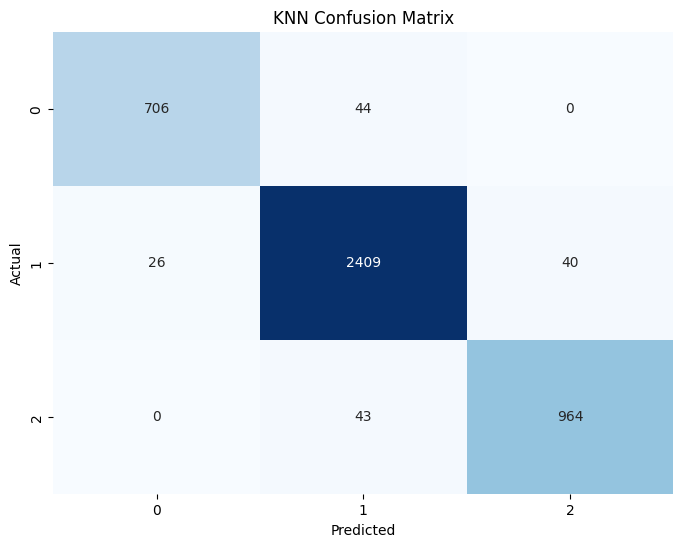

----------------------------------------------------------------------------------------------------

==== Decision Tree Classifier ====

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       750
           1       1.00      1.00      1.00      2475
           2       1.00      1.00      1.00      1007

    accuracy                           1.00      4232
   macro avg       1.00      1.00      1.00      4232
weighted avg       1.00      1.00      1.00      4232



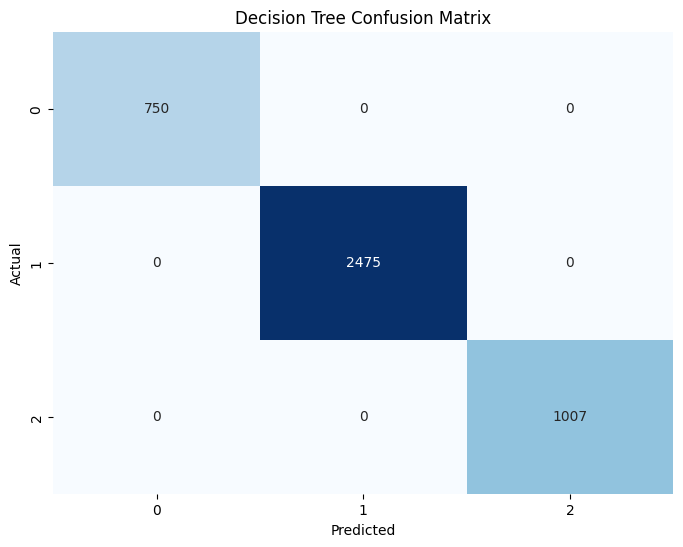

----------------------------------------------------------------------------------------------------

==== Random Forest Classifier ====

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       750
           1       1.00      1.00      1.00      2475
           2       1.00      1.00      1.00      1007

    accuracy                           1.00      4232
   macro avg       1.00      1.00      1.00      4232
weighted avg       1.00      1.00      1.00      4232



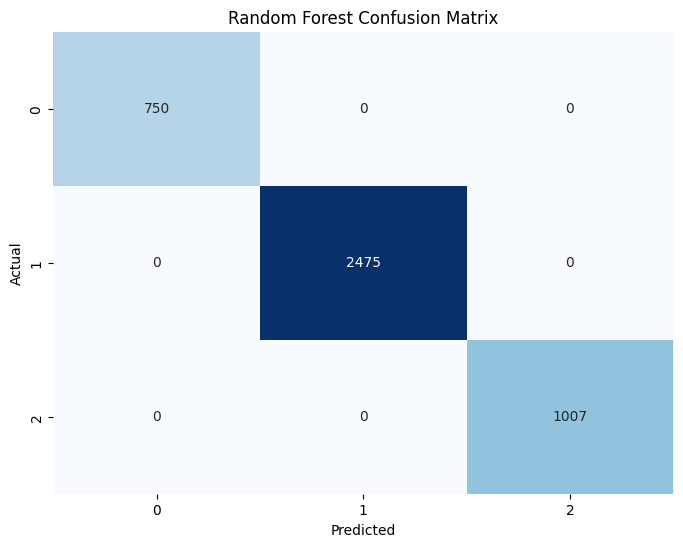

----------------------------------------------------------------------------------------------------

==== SVM Classifier ====

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       750
           1       0.99      0.99      0.99      2475
           2       0.99      0.99      0.99      1007

    accuracy                           0.99      4232
   macro avg       0.99      0.99      0.99      4232
weighted avg       0.99      0.99      0.99      4232



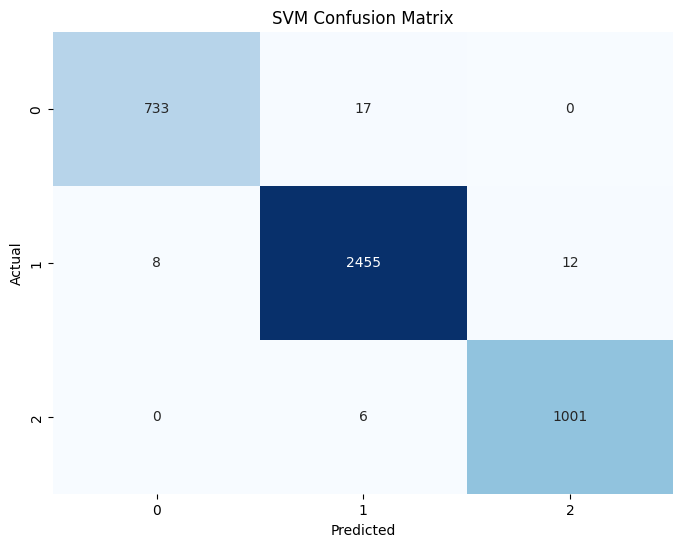

----------------------------------------------------------------------------------------------------

==== Gaussian Naive Bayes Classifier ====

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.85      0.86       750
           1       0.90      0.90      0.90      2475
           2       0.84      0.86      0.85      1007

    accuracy                           0.88      4232
   macro avg       0.87      0.87      0.87      4232
weighted avg       0.88      0.88      0.88      4232



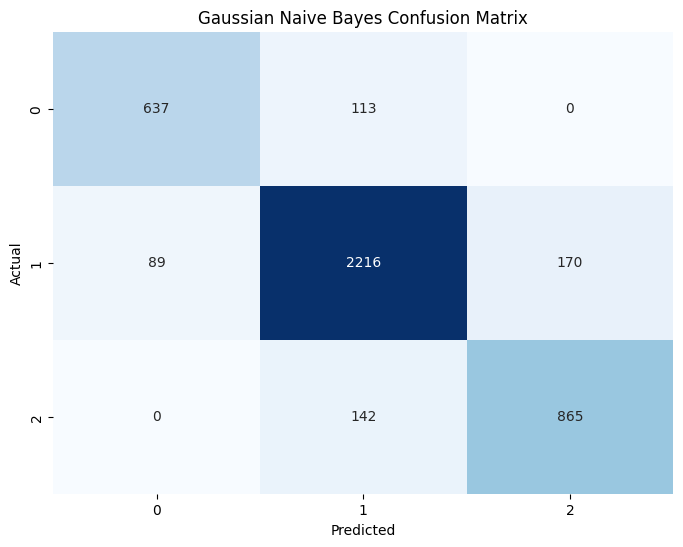

----------------------------------------------------------------------------------------------------



In [41]:
for name, model in models.items():
    y_pred = model.predict(X_train) # Dataset latih
    cm = confusion_matrix(y_train, y_pred)
    report = classification_report(y_train, y_pred)

    print(f"==== {name} Classifier ====")
    print("\nClassification Report:")
    print(report)

    # Visualisasi Confusion Matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'{name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    print("-" * 100 + "\n")

### Interpretasi Hasil

1. **Model K-Nearest Neighbors (KNN)** menunjukkan kinerja yang sangat baik dengan akurasi sekitar 96%. Model ini mampu mengklasifikasikan sebagian besar data latih dengan benar. Namun, karena KNN sangat bergantung pada kedekatan data dan skala, ada kemungkinan performa menurun jika data uji memiliki distribusi berbeda atau outlier.
2. **Model Decision Tree** mencapai akurasi sempurna (100%) pada data latih. Ini menunjukkan bahwa kedua model ini sangat cocok dengan data, bahkan bisa jadi terlalu cocok. Hasil ini mengindikasikan potensi overfitting, yaitu ketika model menghafal data latih dan mungkin tidak mampu melakukan generalisasi dengan baik terhadap data baru (data uji).
3. **Model Random Forest**, yang merupakan kumpulan (ensemble) dari banyak pohon keputusan, juga menunjukkan akurasi 100%. Ini menunjukkan bahwa Random Forest mampu mengenali pola dalam data latih dengan sangat baik. Namun, seperti Decision Tree, performa yang terlalu tinggi ini bisa menandakan overfitting. Meskipun Random Forest lebih tahan terhadap overfitting dibanding satu pohon, tetap perlu diuji pada data uji untuk memastikan model tidak hanya menghafal data latih.
4. **Model Support Vector Machine (SVM)** juga menunjukkan performa sangat tinggi dengan akurasi 99%. Tidak seperti pohon keputusan, SVM bekerja dengan mencari hyperplane terbaik dalam ruang fitur dan cenderung lebih tahan terhadap overfitting. Hasil ini menunjukkan bahwa SVM dapat menjadi kandidat kuat untuk model akhir karena mampu menangkap pola kompleks dengan generalisasi yang baik.
5. **Model Gaussian Naive Bayes** memiliki performa terendah di antara kelima model, dengan akurasi sekitar 88%. Walaupun cukup baik, model ini diasumsikan fitur-fitur input saling independen, yang dalam kenyataannya tidak selalu terjadi pada data kesehatan mental. Hal ini mungkin menjadi penyebab performanya tidak setinggi model lain.

### Kesimpulan
Secara umum, semua model menunjukkan kinerja yang sangat tinggi pada data latih, dengan pengecualian Gaussian Naive Bayes. Model Decision Tree dan Random Forest tampil sempurna, tetapi kemungkinan besar mengalami overfitting. SVM dan KNN menunjukkan performa tinggi dengan potensi generalisasi yang lebih baik. Untuk memastikan kemampuan generalisasi model, langkah selanjutnya adalah melakukan evaluasi pada data uji, yang akan memberikan gambaran nyata seberapa baik model dapat bekerja dalam situasi yang belum pernah dilihat sebelumnya.

## Evaluasi Model dengan Dataset Uji

Setelah mengevaluasi model pada data latih, langkah selanjutnya adalah menguji performa kelima model pada data uji. Evaluasi pada data uji penting untuk mengetahui seberapa baik model dapat menggeneralisasi terhadap data baru yang belum pernah dilihat sebelumnya. Pada tahap ini, digunakan metrik evaluasi berupa classification report (precision, recall, f1-score, dan akurasi), serta visualisasi confusion matrix untuk memberikan gambaran lebih jelas terhadap prediksi model.

==== KNN Classifier ====

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.87      0.92       173
           1       0.93      0.97      0.95       638
           2       0.94      0.91      0.93       247

    accuracy                           0.94      1058
   macro avg       0.94      0.92      0.93      1058
weighted avg       0.94      0.94      0.94      1058



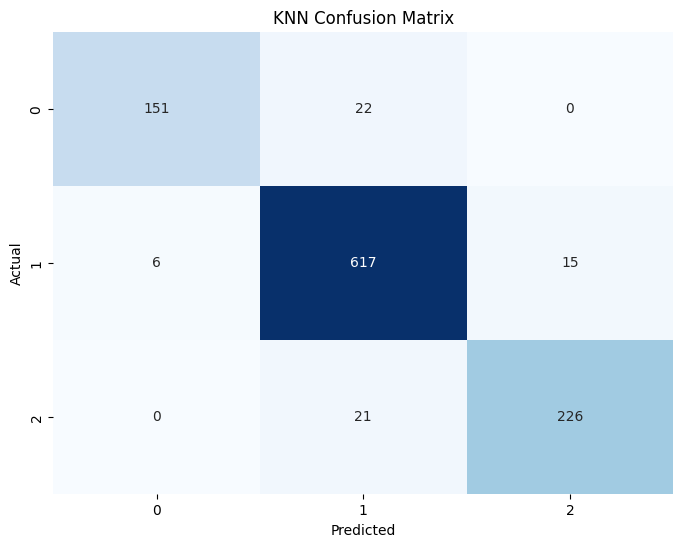

----------------------------------------------------------------------------------------------------

==== Decision Tree Classifier ====

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       173
           1       1.00      1.00      1.00       638
           2       1.00      0.99      0.99       247

    accuracy                           1.00      1058
   macro avg       1.00      1.00      1.00      1058
weighted avg       1.00      1.00      1.00      1058



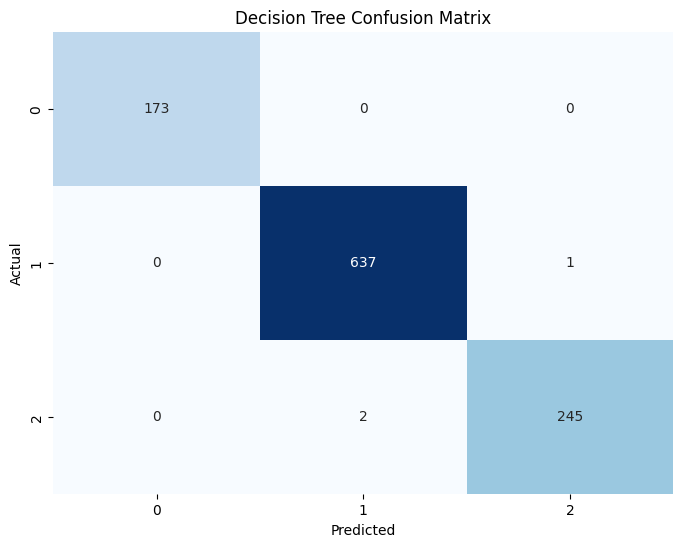

----------------------------------------------------------------------------------------------------

==== Random Forest Classifier ====

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       173
           1       0.98      0.99      0.99       638
           2       0.99      0.97      0.98       247

    accuracy                           0.98      1058
   macro avg       0.99      0.98      0.98      1058
weighted avg       0.98      0.98      0.98      1058



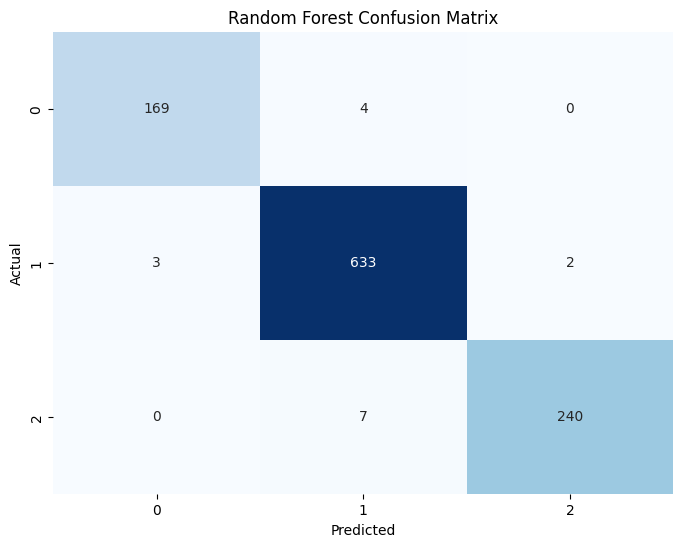

----------------------------------------------------------------------------------------------------

==== SVM Classifier ====

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.95      0.97       173
           1       0.98      0.99      0.99       638
           2       0.98      0.98      0.98       247

    accuracy                           0.98      1058
   macro avg       0.98      0.98      0.98      1058
weighted avg       0.98      0.98      0.98      1058



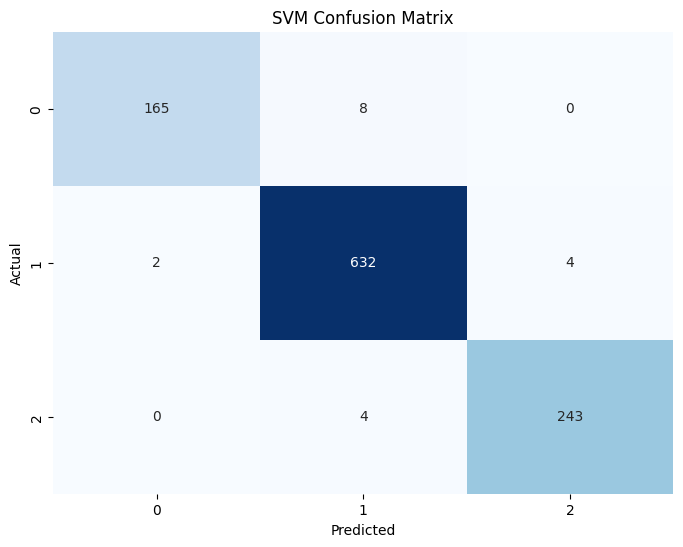

----------------------------------------------------------------------------------------------------

==== Gaussian Naive Bayes Classifier ====

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.83      0.84       173
           1       0.89      0.90      0.89       638
           2       0.84      0.82      0.83       247

    accuracy                           0.87      1058
   macro avg       0.86      0.85      0.85      1058
weighted avg       0.87      0.87      0.87      1058



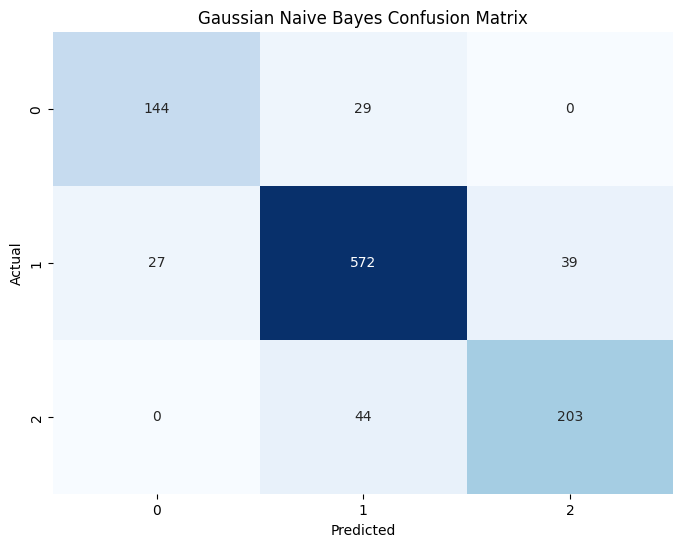

----------------------------------------------------------------------------------------------------



In [42]:
for name, model in models.items():
    y_pred = model.predict(X_test) # Data uji
    cm = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    print(f"==== {name} Classifier ====")
    print("\nClassification Report:")
    print(report)

    # Visualisasi Confusion Matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'{name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    print("-" * 100 + "\n")

### Interpretasi Hasil

1. **Model K-Nearest Neighbors (KNN)** menunjukkan performa yang sangat baik pada data uji dengan akurasi sebesar 94%. Meskipun ada sedikit penurunan dibandingkan data latih (96%), hal ini masih wajar dan mengindikasikan bahwa KNN memiliki kemampuan generalisasi yang cukup baik. Penurunan recall pada kelas 0 (dari 94% menjadi 87%) menunjukkan bahwa model kadang keliru mengenali kelas tersebut.
2. **Model Decision Tree** kembali menunjukkan akurasi 100%, bahkan pada data uji. Ini adalah hasil yang sangat jarang dan menimbulkan indikasi kuat adanya overfitting — model tampaknya sangat cocok terhadap data yang diberikan, bahkan pada data uji. Meski hasilnya mengesankan, ini perlu diuji lebih lanjut pada data yang benar-benar baru atau cross-validation untuk memastikan performa yang stabil.
3. **Model Random Forest**menghasilkan akurasi 98% pada data uji. Meskipun tidak sempurna seperti Decision Tree, hasil ini jauh lebih realistis dan mengindikasikan bahwa model mampu menangkap pola kompleks tanpa berlebihan. Performanya sangat konsisten di semua kelas, menunjukkan stabilitas dan kehandalan tinggi dalam klasifikasi risiko kesehatan mental.
4. **Model Support Vector Machine (SVM)** juga tampil sangat baik dengan akurasi 98%, mirip dengan Random Forest. SVM menunjukkan distribusi metrik yang seimbang di seluruh kelas. Dengan f1-score tinggi dan sedikit perbedaan antara precision dan recall, SVM terlihat sebagai salah satu model paling stabil dan tidak overfit, cocok untuk deployment jangka panjang.
5. **Model Gaussian Naive Bayes** mencatat akurasi 87%, sedikit lebih rendah dari model lainnya. Meski begitu, ini tetap performa yang layak. Namun, dibanding model lain, terlihat bahwa prediksi GNB lebih lemah dalam mengklasifikasikan kelas 0 dan 2 (recall hanya sekitar 82–83%). Hal ini kemungkinan besar disebabkan oleh asumsi independensi antar fitur yang tidak sepenuhnya berlaku di data ini.

### Kesimpulan Akhir
- SVM dan Random Forest merupakan dua model terbaik dengan keseimbangan performa tinggi, stabil, dan generalisasi yang kuat.

- Decision Tree menunjukkan performa sempurna, tetapi perlu diwaspadai karena kemungkinan besar mengalami overfitting, meskipun data uji menghasilkan akurasi tinggi.

- KNN menunjukkan performa baik, namun sensitif terhadap distribusi data dan cenderung memiliki penurunan kecil pada recall.

- Gaussian Naive Bayes adalah model dengan performa paling rendah, tetapi masih cukup baik untuk baseline, terutama karena kesederhanaannya.